In [11]:
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn import linear_model

In [772]:
with open('baselines/all_runs.json', 'r') as f:
    all_runs = json.load(f)

In [773]:
all_runs = all_runs[:]

In [774]:
len(all_runs)

40

In [775]:
x = np.arange(len(all_runs))
y = np.array(all_runs)

In [776]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Make predictions using the testing set
lin_y = regr.predict(x.reshape(-1, 1))

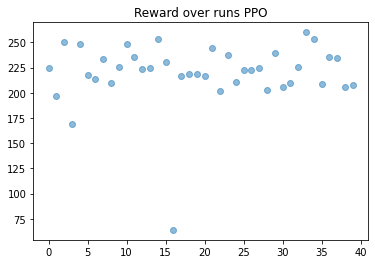

In [779]:
plt.scatter(x, y, alpha=0.5)
#plt.plot(x, lin_y, color="black", linewidth=3)
plt.title('Reward over runs PPO')
plt.show()